In [ ]:
from kuramoto import Kuramoto
from kuramoto.nmf import *
from NNetwork import NNetwork as nn

import networkx as nx
import seaborn as sns

In [37]:
def adj_to_coladj(adj_mat, dynamics):
    col_adj = np.zeros((adj_mat.shape[0], adj_mat.shape[1]))
    for i in range(adj_mat.shape[0]):
        for j in range(i, adj_mat.shape[1]):
            if i == j or adj_mat[i][j] == 0:
                col_adj[i][j] = 0
                col_adj[j][i] = 0
            if adj_mat[i][j] == 1:
                a = abs(dynamics[j] - dynamics[i])
                b = abs(2*np.pi + (dynamics[j] - dynamics[i]))
                col_adj[i][j] = np.round(min(a, b), 2)
                col_adj[j][i] = np.round(min(a, b), 2)
                
    return col_adj

In [3]:
model = Kuramoto(
    coupling=3,
    dt=0.01,
    T=100,
    n_nodes=25,
    base_iter=126,
    natfreqs=None,
    half_sync=False
)

In [4]:
G = nx.newman_watts_strogatz_graph(25, 10, 0.67)
adj = nx.to_numpy_array(G)
sim = model.run(adj)

In [188]:
def predict_concentration(colors):
        '''
        computes width from a color list
        '''
        ordered = list(np.pi - colors); ordered.sort()
        lordered = len(ordered)
        threshold = np.pi
        if ordered == 0:
            assert("Empty array or logic error.")
        elif lordered == 1:
            return 0
        elif lordered == 2:
            dw = ordered[1]-ordered[0]
            if dw > threshold:
                return 2*np.pi - dw
            else:
                return dw
        else:
            widths = [2*np.pi+ordered[0]-ordered[-1]]
            for i in range(lordered-1):
                widths.append(ordered[i+1]-ordered[i])
            return np.abs(2*np.pi - max(widths))

In [189]:
for i in range(1, 126):
    if predict_concentration(sim.T[i]) < np.pi:
        print(i)
        break

38


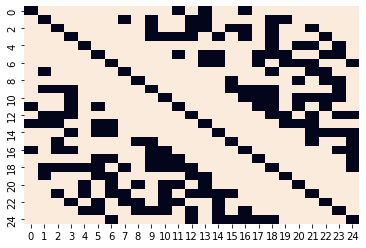

In [7]:
sns.heatmap(adj, cbar=False, robust=True);

In [8]:
dynamics = sim.T[0]
dynamics

array([4.81905827, 1.09911013, 0.86400258, 1.39278627, 6.11844443,
       0.59459201, 0.7641233 , 1.14739979, 2.61852695, 4.80784259,
       1.07933717, 0.06496069, 5.46406818, 3.69123214, 1.81873437,
       6.17567719, 1.62945827, 3.2020944 , 3.78647174, 4.8099828 ,
       0.22453039, 1.22314812, 2.23349185, 2.38558595, 5.56552263])

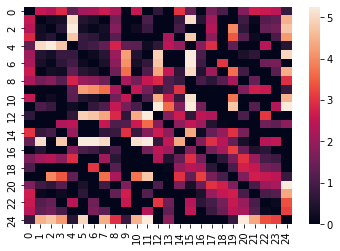

In [10]:
col_adj = adj_to_coladj(adj, dynamics)
sns.heatmap(col_adj, robust=True);

In [25]:
dynamics = sim.T[125]
dynamics

array([0.48420703, 0.89585501, 0.82965541, 0.8999636 , 0.7106097 ,
       0.69690694, 0.82779463, 0.8072915 , 1.08886805, 0.4443445 ,
       0.68894883, 0.75083901, 0.66554065, 1.76410706, 0.9598702 ,
       0.80626478, 1.03808114, 1.36502261, 1.78703111, 0.45421075,
       0.78305349, 0.9385931 , 1.07583318, 1.125077  , 0.64275623])